In [1]:
import site
import matplotlib.pyplot as plt
import numpy as np
from a405thermo.constants import constants as c
from a405thermo.thermlib import *
from a405skewT.makeSkewII import makeSkewWet

#Carnot heat engine:
#
# Dry adiabatic ascent from A to B
# Moist adiabatic ascent from B to C
# Isobaric cooling from C to D
# Moist adiabatic descent from D to E
# Isobaric warming from E to A


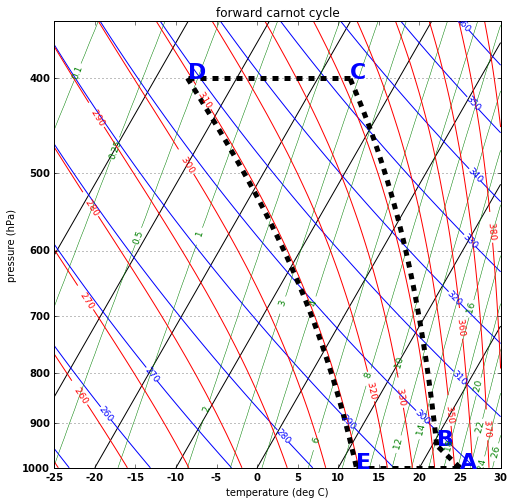

In [2]:
%matplotlib inline

# plot cycle onto tephigram 

# adiabatic ascent from bottom
pressA=1.e5 # at the bottom (A and F)
tempA=25 + c.Tc
pressC=0.4e5 # at the top (C and D)

relhumA = 0.8
rsatA = find_rsat(tempA, pressA)
rvapA = relhumA*rsatA # total water
tdA = find_Td(rvapA, pressA)

# rise to LCL
tempB, pressB = find_lcl(tdA, tempA, pressA) # LCL (B)

theta = find_theta(tempA, pressA, rv=rvapA)
lcl_pres = np.linspace(pressA, pressB, 100)

temps_lcl = []
for pres in lcl_pres:
    temps_lcl.append(theta/(c.p0/pres)**(c.Rd/c.cpd))
temps_lcl = np.array(temps_lcl)
    
# rise to top
thetaetB = find_thetaet(tempB, rvapA, tempB, pressB)
asc_pres = np.linspace(pressB, pressC, 1000)
moist_temps_ascent = np.array([find_Tmoist(thetaetB,pres) for pres in asc_pres]) # right boundary of cycle

tempC = moist_temps_ascent[-1]
rsatC = find_rsat(tempC, pressC)
rvapC,rlC = find_rvrl(tempC, rsatC, pressC)

# isobaric cooling at top, total water conserved
tempD = tempC - 20.
pressD = pressC
rvapD,rlD = find_rvrl(tempD, rsatC, pressD)

top_temps = np.linspace(tempC, tempD, 100)

thetaetD = find_thetaet(tempD, rvapD, tempD, pressD)
des_pres = np.linspace(pressD, pressA, 1000)
moist_temps_descent = np.array([find_Tmoist(thetaetD,pres) for pres in des_pres]) # left boundary of cycle

tempE = moist_temps_descent[-1]
rvapE,rlE = find_rvrl(tempE, rvapD, pressA)

bot_temps = np.linspace(tempE, tempA, 100)

plt.close('all')
fig,ax = plt.subplots(1,1, figsize=(8,8))
corners =  [-25,30]
ax, skew = makeSkewWet(ax,corners=corners)

# convert corners to letters
xtempA=convertTempToSkew(tempA - c.Tc,pressA*0.01,skew)
xtempB=convertTempToSkew(tempB - c.Tc,pressB*0.01,skew)
xtempC=convertTempToSkew(tempC - c.Tc,pressC*0.01,skew)
xtempD=convertTempToSkew(tempD - c.Tc,pressD*0.01,skew)
xtempE=convertTempToSkew(tempE - c.Tc,pressA*0.01,skew)

# plot letters
ax.text(xtempA,pressA*0.01,'A', fontweight='bold',fontsize= 22, color='b')

ax.text(xtempB,pressB*0.01,'B', fontweight='bold',fontsize= 22,color='b')

ax.text(xtempC,pressC*0.01,'C', fontweight='bold',fontsize= 22,color='b')

ax.text(xtempD,pressD*0.01,'D', fontweight='bold',fontsize= 22, color='b')

ax.text(xtempE,pressA*0.01,'E', fontweight='bold',fontsize= 22, color='b')


# plot boundaries
xtemplcl=convertTempToSkew(temps_lcl - c.Tc,lcl_pres*0.01,skew) # A -> B
ax.plot(xtemplcl,lcl_pres*0.01,"--k",linewidth=5)

xtempAsc=convertTempToSkew(moist_temps_ascent - c.Tc,asc_pres*0.01,skew) # B -> C
ax.plot(xtempAsc,asc_pres*0.01,"--k",linewidth=5)

xtempTop=convertTempToSkew(top_temps - c.Tc,pressC*0.01,skew) # C -> D
ax.plot(xtempTop,[pressC*0.01]*len(xtempTop),"--k",linewidth=5)

xtempDsc=convertTempToSkew(moist_temps_descent - c.Tc,des_pres*0.01,skew) # D -> E
ax.plot(xtempDsc,des_pres*0.01,"--k",linewidth=5)

xtempBot=convertTempToSkew(bot_temps - c.Tc,pressA*0.01,skew) # E -> A
ax.plot(xtempBot,[pressA*0.01]*len(xtempTop),"--k",linewidth=5)

xmin = convertTempToSkew(corners[0],pressA*0.01,skew)
xmax = convertTempToSkew(corners[1],pressA*0.01,skew)
ax.axis([xmin, xmax, 1000, 350])
ax.set_title('forward carnot cycle')
plt.show()

In [3]:
# enthalpy

# bottom

dh_bot = (((c.cpd + rvapA*c.cl)*tempA + rvapA*find_lv(tempA)) - 
          ((c.cpd + (rvapE+rlE)*c.cl)*tempA + rvapE*find_lv(tempE)))
print("Change in enthalpy at surface = {} J/kg".format(dh_bot))

# top
dh_top = (((c.cpd + rvapD*c.cl)*tempD + rvapD*find_lv(tempD)) - 
          ((c.cpd + (rvapC+rlC)*c.cl)*tempC + rvapC*find_lv(tempC)))
print("Change in enthalpy at 400 hPa = {} J/kg".format(dh_top))


Change in enthalpy at surface = 60320.04083572654 J/kg
Change in enthalpy at 400 hPa = -28317.33749582182 J/kg


In [4]:
# work and efficiency
# dq = dh for constant pressure

dw = abs(dh_bot) - abs(dh_top)
eta = (abs(dh_bot) - abs(dh_top))/abs(dh_bot)

print("Work done = {} J/kg, efficiency = {}".format(dw, eta))

Work done = 32002.70333990472 J/kg, efficiency = 0.5305484362495667


In [5]:
# water effects

# temperature only
dh_bot_temp = c.cpd*(tempA - tempE)
water_effects_bot = 1 - dh_bot_temp/dh_bot

dh_top_temp = c.cpd*(tempD - tempC)
water_effects_top = 1 - dh_top_temp/dh_top

print("Heat change due to water at surface = {:.2f}%".format(water_effects_bot*100))
print("Heat change due to water at 400 hPa = {:.2f}%".format(water_effects_top*100))

Heat change due to water at surface = 78.73%
Heat change due to water at 400 hPa = 28.97%
